Статистическая информация о наборе данных: 

D     int64
X1    int64
X2    int64
X3    int64
X4    int64
X5    int64
X6    int64
dtype: object

                D          X1          X2          X3          X4          X5  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.538462    4.314685    2.538462    3.265734    3.699301    3.615385   
std      0.500271    0.799820    1.118155    0.992586    0.888383    1.131639   
min      0.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      0.000000    4.000000    2.000000    3.000000    3.000000    3.000000   
50%      1.000000    5.000000    3.000000    3.000000    4.000000    4.000000   
75%      1.000000    5.000000    3.000000    4.000000    4.000000    4.000000   
max      1.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

               X6  
count  143.000000  
mean     4.216783  
std      0.848693  
min      1.000000  
25%      4.000000  
50%   

Text(0.5, 1.0, 'X4 - доверие к местной полиции \nX1 - доступность информации о городских службах')

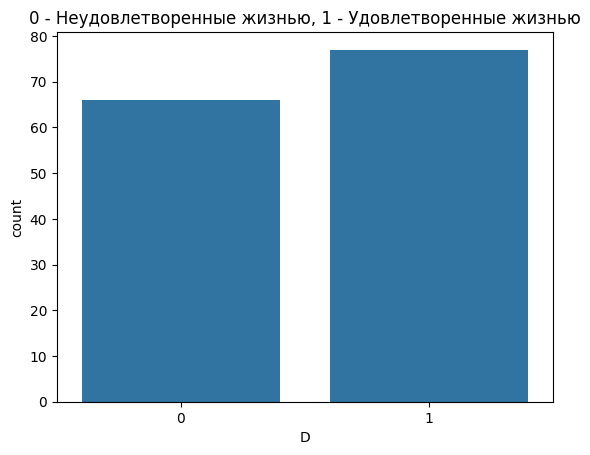

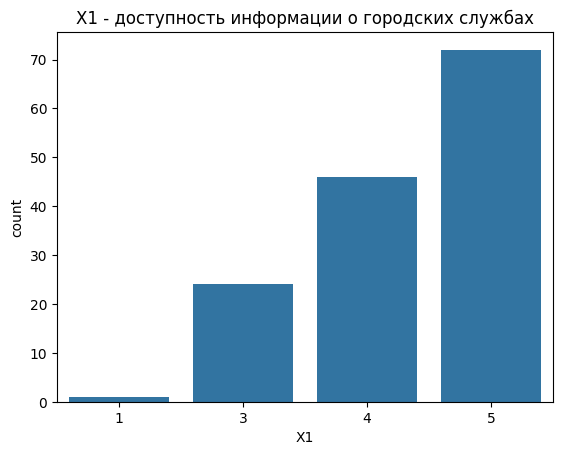

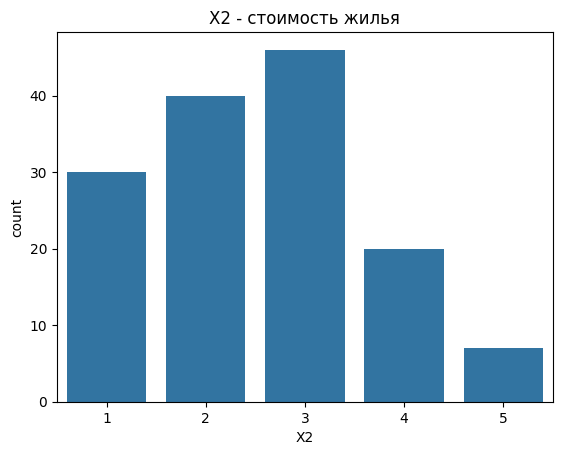

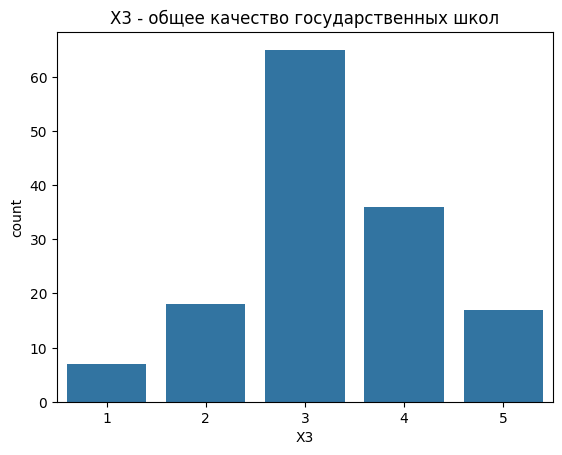

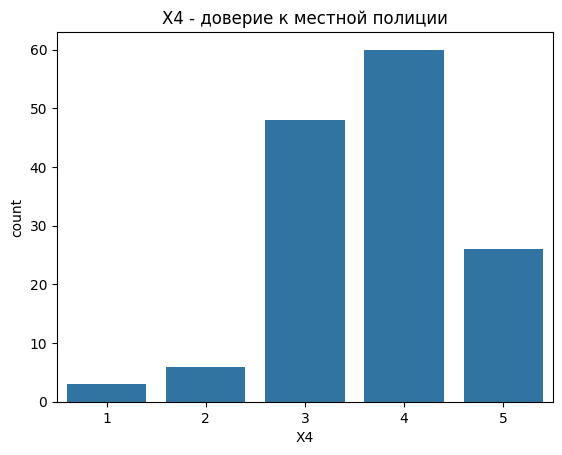

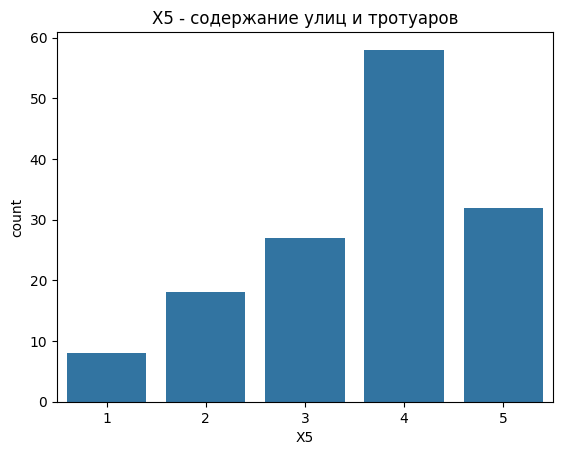

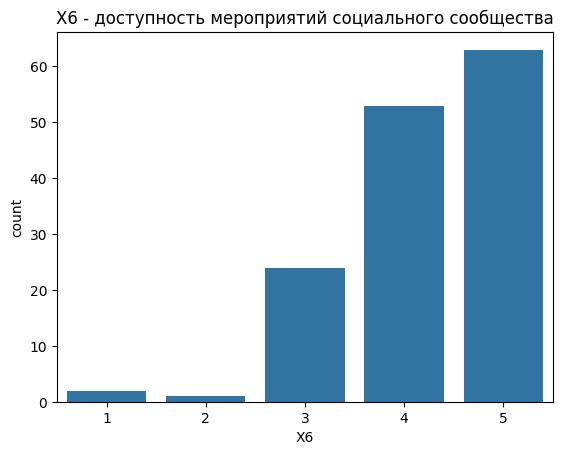

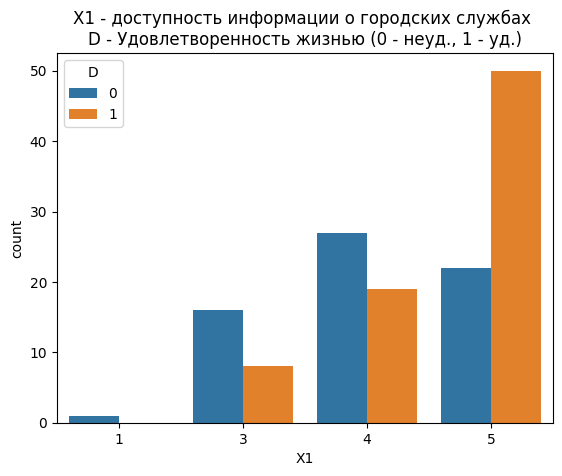

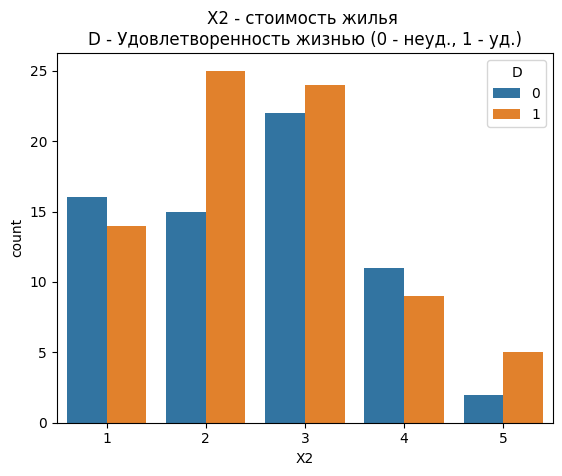

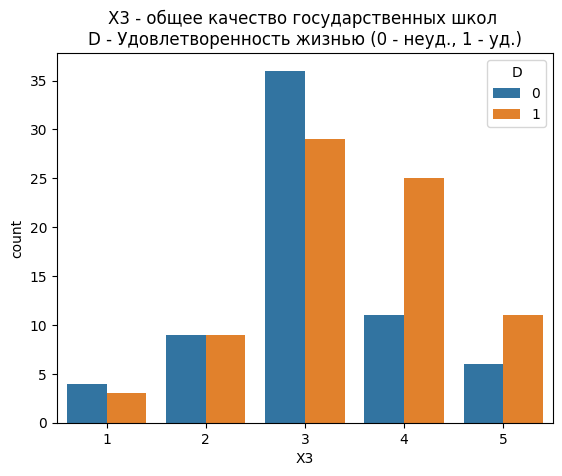

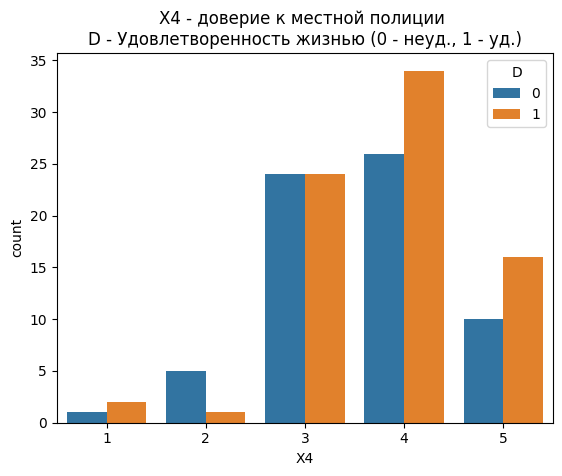

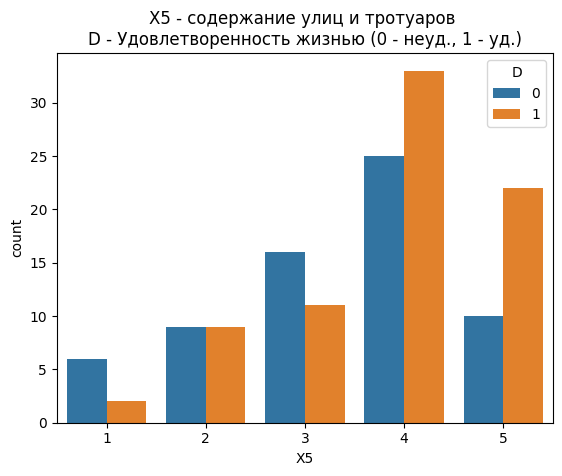

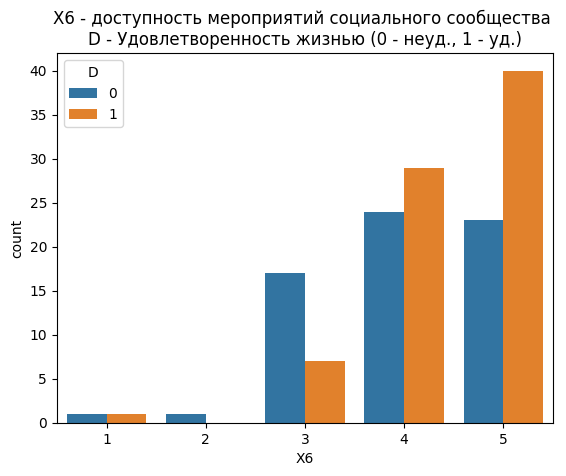

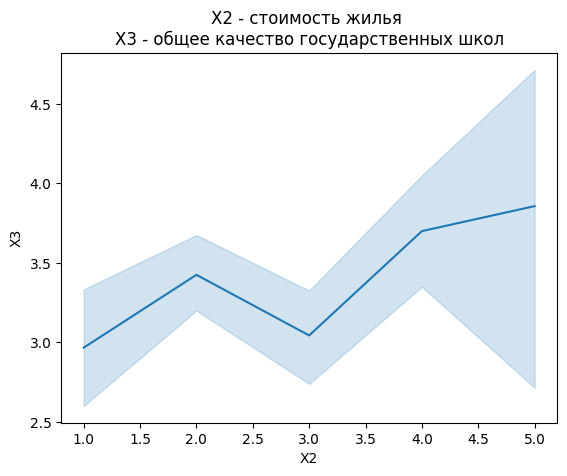

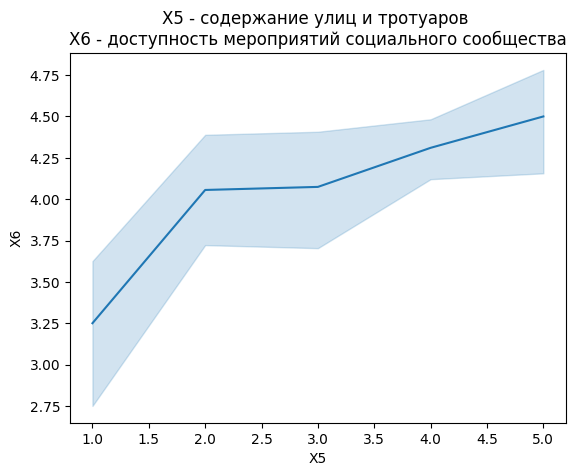

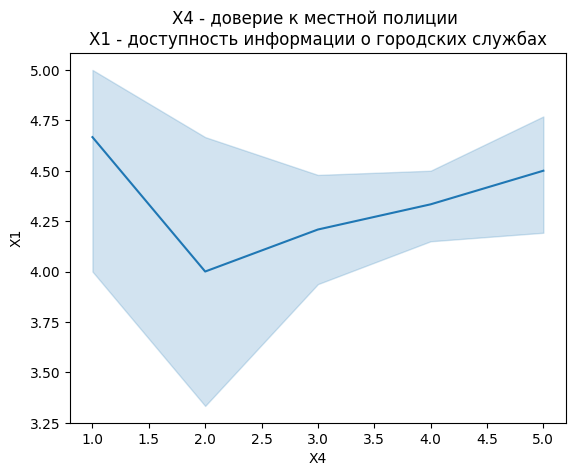

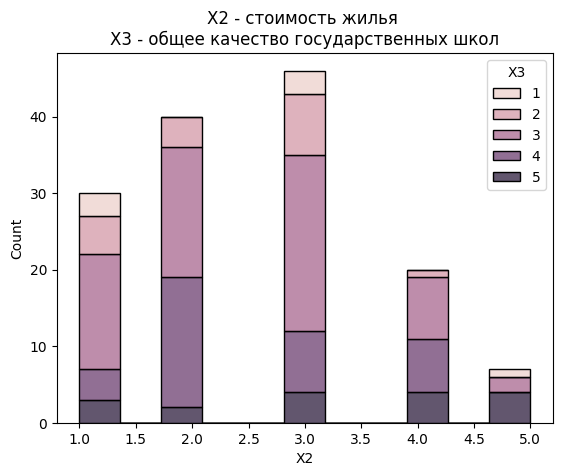

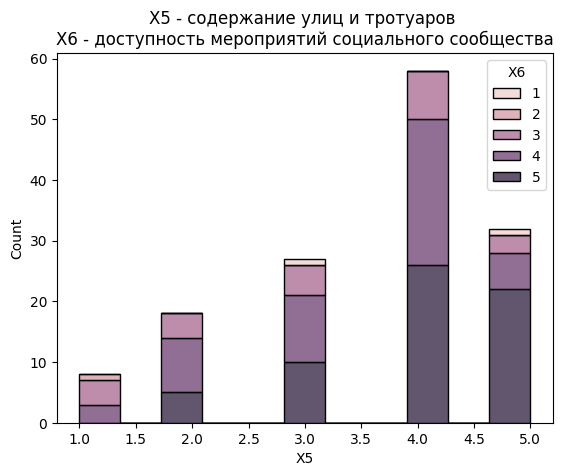

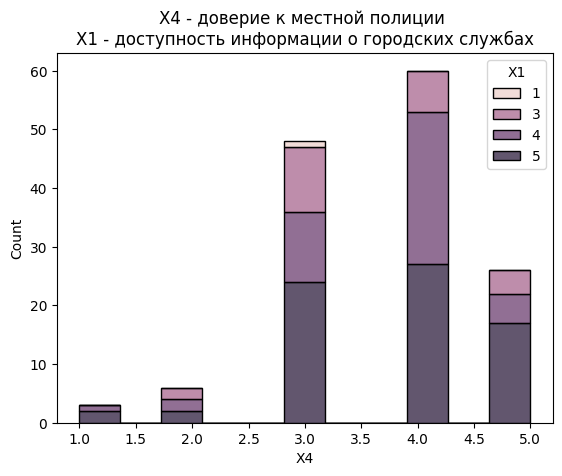

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

'''
1. Скачать один из наборов данных

Набор данных: Опрос о счастье в Сомервилле.
Описание: Выдержка из нефедерального набора данных, размещенного здесь https://catalog.data.gov/dataset/somerville-happiness-survey-responses-2011-2013-2015
Информация об атрибутах:

D - атрибут принятия решения (D) со значениями 0 (неудовлетворительный) и 1 (счастливый)

X1 - доступность информации о городских службах

X2 - стоимость жилья

X3 - общее качество государственных школ

X4 - ваше доверие к местной полиции

X5 - содержание улиц и тротуаров

X6 - доступность мероприятий социального сообщества

Атрибуты X1 - X6 имеют значения от 1 до 5
'''


#2. Загрузить данные в датафрейм
data=pd.read_csv("SomervilleHappinessSurvey2015.csv", delimiter=',', encoding='UTF-16')

#3. Вывести статистическую информацию о наборе данных
print("Статистическая информация о наборе данных: ", end = "\n\n")
print(data.dtypes, end="\n\n")
print(data.describe(), end="\n\n")

#4. Вывести названия столбцов и строк
print("Названия столбцов:",data.columns.values.tolist(), "\n")
print("Названия строк:", data.index.values.tolist(), end = "\n\n")

#5. Заменить категориальные данные количественными
#Так как в моем датафрейме нет категориальных данных, я создам их сам :), после замены я их удалю
#Новый тестовый атрибут: S - пусть принимает значения man/woman

data['gender'] = ''

for ind in data.index:
  random_value = np.random.randint(0,2)
  if random_value == 1:
    data['gender'][ind] = 'man'
  else:
    data['gender'][ind] = 'woman'

print('Добавили тестовый категориальный атрибут gender: ')
print(data.head(7).to_string(), end = '\n\n')

#Заменяем категориальные данные на количественные
data['gender'].replace(['man', 'woman'], [1, 0], inplace=True)
print('Заменили категориальные данные на количественные: ')
print(data.head(7).to_string(), end = '\n\n')

#Удаляем наш тестовый атрибут
data = data.drop('gender', axis = 1)
print('Удалили тестовый атрибут gender: ')
print(data.head(7).to_string(), end = '\n\n')

#6. Визуализировать данные с помощью Matplotlib и Seaborn

plt.figure()
sns.countplot(x=data["D"]).set_title('0 - Неудовлетворенные жизнью, 1 - Удовлетворенные жизнью')

plt.figure()
sns.countplot(x=data["X1"]).set_title('X1 - доступность информации о городских службах')

plt.figure()
sns.countplot(x=data["X2"]).set_title('X2 - стоимость жилья')

plt.figure()
sns.countplot(x=data["X3"]).set_title('X3 - общее качество государственных школ')

plt.figure()
sns.countplot(x=data["X4"]).set_title('X4 - доверие к местной полиции')

plt.figure()
sns.countplot(x=data["X5"]).set_title('X5 - содержание улиц и тротуаров')

plt.figure()
sns.countplot(x=data["X6"]).set_title('X6 - доступность мероприятий социального сообщества')




plt.figure()
sns.countplot(data=data, x="X1", hue='D').set_title('X1 - доступность информации о городских службах \nD - Удовлетворенность жизнью (0 - неуд., 1 - уд.)')

plt.figure()
sns.countplot(data=data, x="X2", hue='D').set_title('X2 - стоимость жилья \nD - Удовлетворенность жизнью (0 - неуд., 1 - уд.)')

plt.figure()
sns.countplot(data=data, x="X3", hue='D').set_title('X3 - общее качество государственных школ \nD - Удовлетворенность жизнью (0 - неуд., 1 - уд.)')

plt.figure()
sns.countplot(data=data, x="X4", hue='D').set_title('X4 - доверие к местной полиции \nD - Удовлетворенность жизнью (0 - неуд., 1 - уд.)')

plt.figure()
sns.countplot(data=data, x="X5", hue='D').set_title('X5 - содержание улиц и тротуаров \nD - Удовлетворенность жизнью (0 - неуд., 1 - уд.)')

plt.figure()
sns.countplot(data=data, x="X6", hue='D').set_title('X6 - доступность мероприятий социального сообщества \nD - Удовлетворенность жизнью (0 - неуд., 1 - уд.)')




plt.figure()
sns.lineplot(data=data, x='X2', y='X3').set_title('X2 - cтоимость жилья \nX3 - общее качество государственных школ')

plt.figure()
sns.lineplot(data=data, x='X5', y='X6').set_title('X5 - содержание улиц и тротуаров \nX6 - доступность мероприятий социального сообщества')

plt.figure()
sns.lineplot(data=data, x='X4', y='X1').set_title('X4 - доверие к местной полиции \nX1 - доступность информации о городских службах')


plt.figure()
sns.histplot(data, x="X2", hue="X3", multiple="stack").set_title('X2 - cтоимость жилья \nX3 - общее качество государственных школ')

plt.figure()
sns.histplot(data, x="X5", hue="X6", multiple="stack").set_title('X5 - содержание улиц и тротуаров \nX6 - доступность мероприятий социального сообщества')

plt.figure()
sns.histplot(data, x="X4", hue="X1", multiple="stack").set_title('X4 - доверие к местной полиции \nX1 - доступность информации о городских службах')
